# Artyom Iudin BVT2101

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mclr
from tensorflow.keras import layers
from tensorflow.keras import models

In [5]:
def genData(size:int=500) -> tuple[tuple[np.ndarray]]:
    size1 = size//2
    size2 = size - size1

    x1 = np.random.rand(size1, 1)*1.3 - 0.95
    y1 = np.asarray([3.5*(i+0.2)**2 - 0.8 + (np.random.rand(1)-0.5)/3 for i in x1])

    data1 = np.hstack((x1, y1))
    label1 = np.zeros([size1, 1])
    div1 = round(size1*0.8)

    x2 = np.random.rand(size2, 1)*1.3 - 0.35
    y2 = np.asarray([-3.5*(i-0.2)**2 + 0.8 + (np.random.rand(1)-0.5)/3 for i in x2])

    data2 = np.hstack((x2, y2))
    label2 = np.ones([size2, 1])
    div2 = round(size2*0.8)

    div = div1 + div2
    order = np.random.permutation(div)

    train_data = np.vstack((data1[:div1], data2[:div2]))
    test_data = np.vstack((data1[div1:], data2[div2:]))

    train_label = np.vstack((label1[:div1], label2[:div2]))
    test_label = np.vstack((label1[div1:], label2[div2:]))

    return (train_data[order, :], train_label[order, :]), (test_data, test_label)

def drawResults(data: np.ndarray, 
                label: np.ndarray, 
                prediction: np.ndarray) -> None:
    p_label = np.array([round(x[0]) for x in prediction])
    plt.scatter(data[:, 0], data[:, 1], s=30, c=label[:, 0], cmap=mclr.ListedColormap(['red', 'blue']))
    plt.scatter(data[:, 0], data[:, 1], s=10, c=p_label, cmap=mclr.ListedColormap(['red', 'blue']))
    plt.grid()
    plt.show()


In [11]:
(train_data, train_label), (test_data, test_label) = genData()

model = models.Sequential()
model.add(layers.Dense(8, activation='relu',))
model.add(layers.Dense(4, activation='relu',))
model.add(layers.Dense(1, activation='sigmoid',))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

H = model.fit(train_data, train_label, batch_size=12, epochs=100, validation_split=0.1)
loss = H.history['loss']
val_loss = H.history['val_loss']
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
epochs = range(1, len(loss) + 1)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3255 - loss: 0.7275 - val_accuracy: 0.6750 - val_loss: 0.7046
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6490 - loss: 0.7039 - val_accuracy: 0.7250 - val_loss: 0.6795
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7460 - loss: 0.6762 - val_accuracy: 0.7500 - val_loss: 0.6550
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7134 - loss: 0.6645 - val_accuracy: 0.7500 - val_loss: 0.6303
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7054 - loss: 0.6418 - val_accuracy: 0.7750 - val_loss: 0.6035
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7937 - loss: 0.6099 - val_accuracy: 0.8000 - val_loss: 0.5749
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8075 - loss: 0.5920 - val_accuracy: 0.8750 - val_loss: 0.5444
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8202 - loss: 0.5643 - val_accuracy: 0.8750 - 

Построение графика ошибки

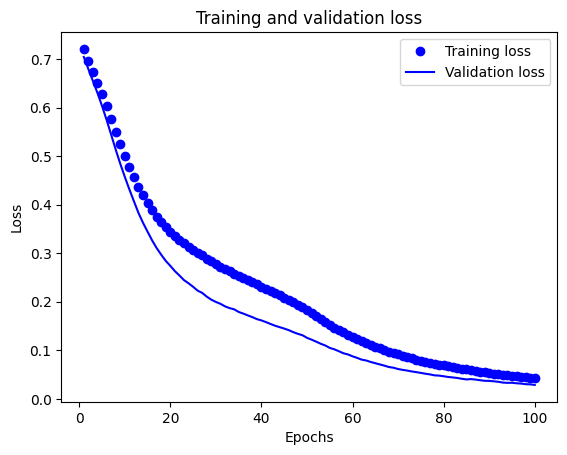

In [12]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Построение графика точности

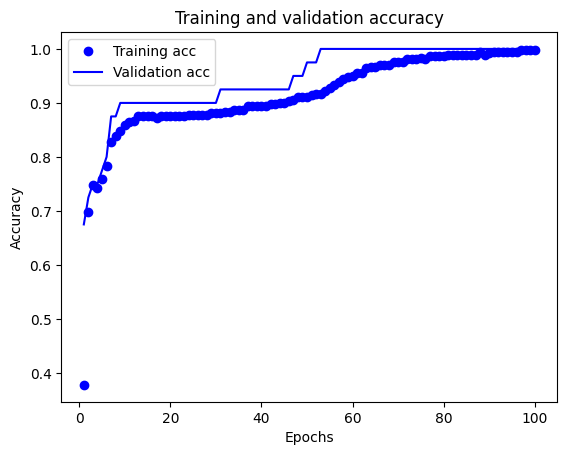

In [13]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Получение и выовд результатов работы на тестовом наборе

In [14]:
results = model.evaluate(test_data, test_label)
print(results)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9845 - loss: 0.0456 
[0.04239482805132866, 0.9900000095367432]


Вывод результатов бинарной классификации

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


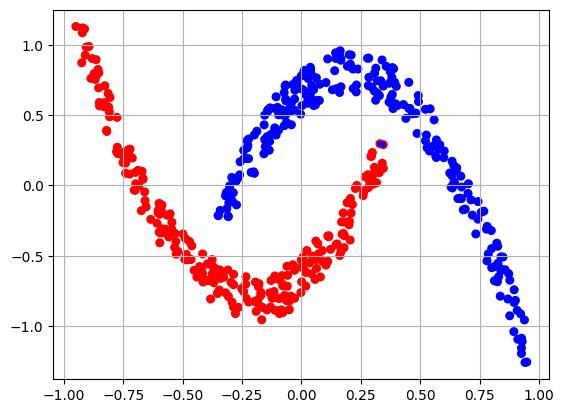

In [15]:
all_data = np.vstack((train_data, test_data))
all_label = np.vstack((train_label, test_label))
pred = model.predict(all_data)
drawResults(all_data, all_label, pred)